# Predicting Restaurant Food Cost 

The dataset contains food prices at different restaurants alongwith other associated features. The dataset can be used to analyse what factors affect food prices at restaurants and we can also prepare a machine learning model to predict the food prices for different restaurants.

## About the data

- Size of training set: 12,690 records


- Size of test set: 4,231 records


__FEATURES:__


- TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.


- RESTAURANT_ID: A unique ID for each restaurant.


- CUISINES: The variety of cuisines that the restaurant offers.


- TIME: The open hours of the restaurant.


- CITY: The city in which the restaurant is located.


- LOCALITY: The locality of the restaurant.


- RATING: The average rating of the restaurant by customers.


- VOTES: The overall votes received by the restaurant.


- COST: The average cost of a two-person meal.

In [7]:
# Importing the data
import pandas as pd 
import numpy as np

train = pd.read_excel(r'C:\Users\User\Desktop\Projects\Data_Train.xlsx')
test = pd.read_excel(r'C:\Users\User\Desktop\Projects\Data_Test.xlsx')

train.shape, test.shape

((12690, 9), (4231, 8))

#### Exploring the data

In [17]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [18]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


The training dataset has 12690 examples, 8 feature columns and 1 target column. 7 of the 9 features are type object data, and the target column 'COST' is of the type int64 including the 'RESTAURANT_ID'

In [21]:
train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


- Both the column's do not have any missing values.


- The average cost is 500 and the minimal cost is 20, which is extremly pocket friendly.


- The maximum Fees is 14000, there is a huge difference between the minimum and the maximum, this it effects the distribution of the data

In [22]:
train.describe(include=['O'])

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,12690,12690,12690,12578,12592,12688,11486
unique,113,4155,2689,359,1416,32,1847
top,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes
freq,4218,532,1415,2174,166,1238,71


- The column 'TITLE' has 113 unique values, out of which Quick Bites is the most frequently occuring, hence maximum number of entries in our data is of cafes.


- The column 'CUISINES' has 4155 unique cousine entries, the most favourite cousine being 'South Indian'.

- The column 'CITY' has 359 unique location entries , the most frequently occuring city is 'Chennai'


- The column 'RATING' has 3.9 unique entries, Most of the entries are of 3.9


- The column 'VOTES' has only 1847 unique entries, out of which 44 is the most frequently occuring.

#### Combining the train and test data

In [8]:
df = pd.concat([train.assign(ind="train"), test.assign(ind="test")])
df.shape

(16921, 10)

# Feature Engineering

In [9]:
df.nunique()

TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               450
LOCALITY          1636
RATING              32
VOTES             2075
COST                86
ind                  2
dtype: int64

- The column Restraunt_ID has 15,574 unique values which is almost equal to the number of entries. 


- The TIME column can be used to extract important features such as opening time, closing time, closing days, etc. However the column does not work efficiently thus i dropped it. 


- For values in CITY column which also contained locality, and thus we only keep only relevant ones.

In [10]:
df.drop(['RESTAURANT_ID','TIME','LOCALITY'], axis=1, inplace=True)

The column 'VOTES' has the phrase 'votes' attached to the numerical value which needs to be dropped

In [11]:
df['VOTES'] = df['VOTES'].str.replace('votes','')

#### Treating the column CITY

In [12]:
df.dropna(subset=['CITY'],inplace=True)

#### Data Cleaning - City

In [13]:
import fuzzywuzzy
from fuzzywuzzy import process
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x = process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array

C:\Users\User\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [14]:
df['CITY'].value_counts().head(20)

Chennai          2855
Bangalore        2835
Hyderabad        2458
Mumbai           2311
New Delhi        1754
Kochi            1751
Gurgaon           524
Secunderabad      396
Noida             274
Navi Mumbai       222
Ghaziabad         132
Thane             118
Faridabad         109
Bandra West        85
Thane West         73
Andheri West       69
Bengaluru          61
Greater Noida      38
India              31
Kakkanad           20
Name: CITY, dtype: int64

In [15]:
#location should contain one of the following categories or 'Others' as set in the match names function
correct_names=['Chennai ', 'Bangalore',     
'Hyderabad','Mumbai',         
'New Delhi','Kochi',           
'Gurgaon', 'Secunderabad',    
'Noida', 'Navi Mumbai',    
'Ghaziabad','Thane',       
'Faridabad','Bandra West',       
'Thane West','Andheri West',      
'Bengaluru','Greater Noida',    
'India']

In [16]:
name_match=match_names(df.CITY,correct_names)    

print(len(names_array))
df['CITY']=names_array

16774


In [23]:
df["CITY"].value_counts()

Chennai          2900
Bangalore        2882
Hyderabad        2490
Mumbai           2343
New Delhi        1795
Kochi            1778
Gurgaon           537
Secunderabad      402
Others            374
Noida             279
Navi Mumbai       229
Ghaziabad         134
Thane             126
Faridabad         111
Bandra West        96
Thane West         84
Andheri West       74
Bengaluru          62
India              40
Greater Noida      38
Name: CITY, dtype: int64

In [24]:
df.isna().sum()

TITLE          0
CUISINES       0
CITY           0
RATING         4
VOTES       1584
COST        4196
ind            0
dtype: int64

#### Cleaning - Cuisine

In [25]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [26]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))

#### Cleaning - Title

In [27]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list

In [28]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))

#### Cleaning - Rating 

In [29]:
df[df['RATING'].isna()]

,TITLE,CUISINES,CITY,RATING,VOTES,COST,ind
204,[BAKERY],[Bakery],Kochi,NaN,NaN,200.0,train
421,[CAFÉ],"[Cafe, Fast Food]",Hyderabad,NaN,NaN,350.0,train
2035,[QUICK BITES],"[Kerala, Arabian]",Kochi,NaN,NaN,NaN,test
2758,[None],"[Chinese, North Indian, South Indian]",Kochi,NaN,NaN,NaN,test


In [30]:
df["RATING"] = df.groupby("CITY").RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [31]:
df['RATING']=df['RATING'].str.extract('(\d+)').astype(float)

#### Cleaning - votes

In [32]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [33]:
df_City = pd.get_dummies(df['CITY'])

df_City.head()

,Andheri West,Bandra West,Bangalore,Bengaluru,Chennai,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Hyderabad,India,Kochi,Mumbai,Navi Mumbai,New Delhi,Noida,Others,Secunderabad,Thane,Thane West
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

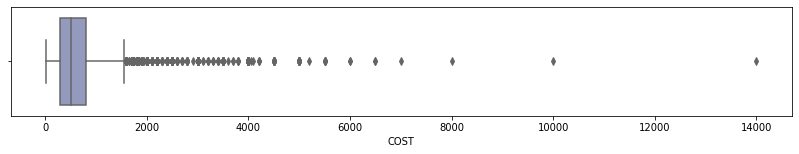

In [36]:
plt.figure(figsize=(14,2))
sns.boxplot('COST', data=df, palette='BuPu')

- The minimum cost is less than 100 and the maximum cost is 14000 and has a median cost of around 500. 


- There are outliers present the the data.


- The outlier's will not be treated it as it is the cost of the restraurants which changes with respect to the different kind of restaurants.

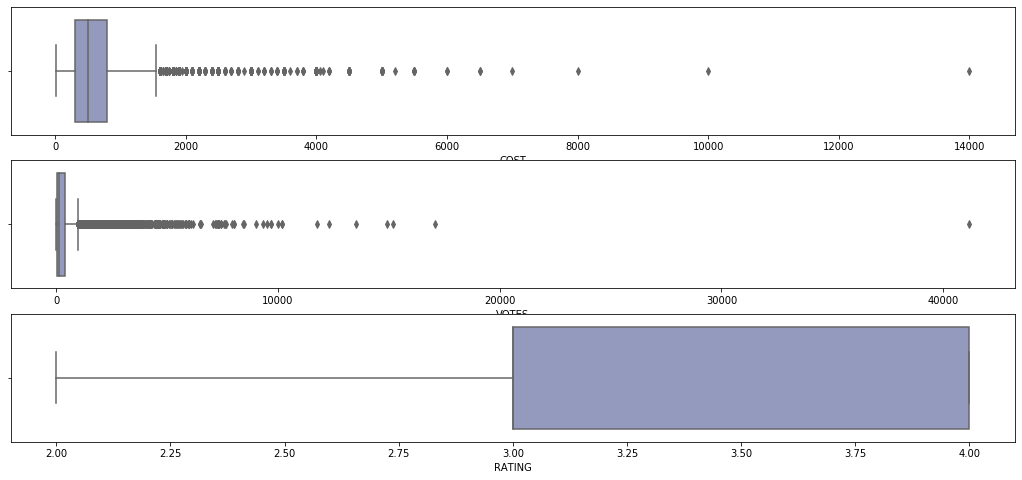

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(18, 8))

sns.boxplot(ax=axes[0], x=df['COST'], palette='BuPu')
sns.boxplot(ax=axes[1], x=df['VOTES'], palette='BuPu')
sns.boxplot(ax=axes[2], x=df['RATING'], palette='BuPu')

- The column COST and VOTES have multiple Outlier's but its valid to have outliers for values like COST and VOTES.


- Also, since the number of outlier's are too many in number thus the rows should not be deleted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D258E3848>,
      dtype=object)

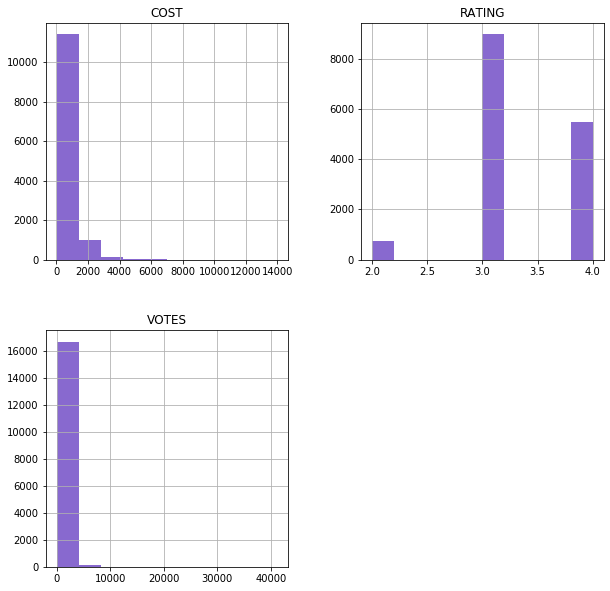

In [40]:
df.hist(figsize=(10,10), color='#8869cf')

- 90% of the restaurants cost is below 1250


- Most of the restaurants have the rating equivalent to 3 i.e. almost 8000 and above


- Most of the votes are distributed around 0 to 100

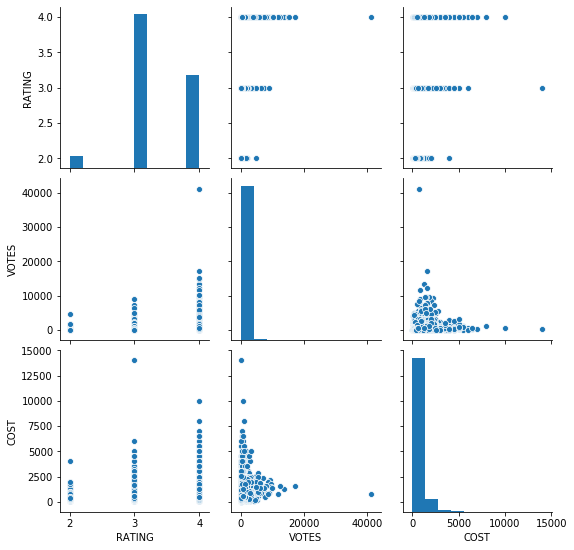

In [43]:
sns.pairplot(df)

- The pairplot does not reveal any negative or possitive corelation

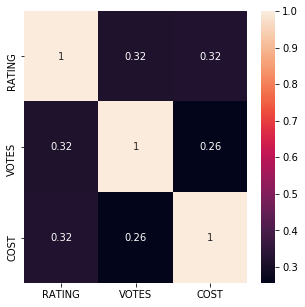

In [46]:
corr_hmap=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_hmap,annot=True)
plt.show()

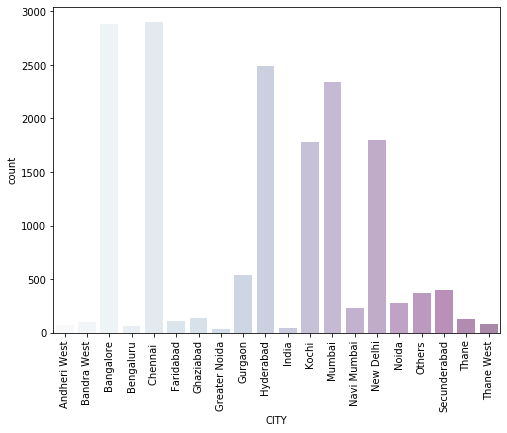

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['CITY'].sort_values(), ax=ax, color='b', alpha=0.5, palette='BuPu')
plt.xticks(rotation=90)
plt.show()

- From the above count plot we could see that the maximum Restaurants are present in Bangalore city which is followed by Chennai, Hyderabad ,Mumbai and Delhi which are all big metro city in India where as other locations are having less than 500 restaurants each. 


- Bangalore is having more Restaurants which is around 2900.

In [48]:
# Since 'CUISINES' has been dummified hence it can be dropped

df.drop(columns='CUISINES',inplace=True)

In [49]:
# Since 'CITY' has been dummified hence it can be dropped

df.drop(columns='CITY',inplace=True)

#### Concatinating 

In [50]:
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [51]:
df.drop(columns='TITLE',inplace=True)

In [52]:
df_column_category = df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['ind'], dtype='object')

In [53]:
df.fillna(0,inplace=True)

# Training Phase

In [54]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
test = test.drop(['ind','COST'], axis=1)
train = train.drop(['ind'], axis=1)

In [55]:
pd.options.display.max_columns = None
train.head()

,RATING,VOTES,COST,Andheri West,Bandra West,Bangalore,Bengaluru,Chennai,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Hyderabad,India,Kochi,Mumbai,Navi Mumbai,New Delhi,Noida,Others,Secunderabad,Thane,Thane West,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,Tibetan,Desserts,Seafood,Cafe,Pizza,Burger,Bar Food,South Indian,Fast Food,Fast Food,Beverages,Arabian,Mughlai,Maharashtrian,Parsi,Chinese,Thai,Bakery,Momos,Continental,European,Rolls,Andhra,Italian,Biryani,BBQ,Italian,Finger Food,Continental,Asian,Tea,American,Healthy Food,Beverages,Coffee,Indonesian,Korean,South Indian,American,Nepalese,European,Ice Cream,Desserts,Mexican,Kerala,Seafood,Indian,Pizza,Mithai,Street Food,Mithai,Rolls,Malaysian,Vietnamese,Thai,Arabian,Iranian,Kebab,Juices,Sandwich,Burger,Hyderabadi,Andhra,Maharashtrian,Mediterranean,Salad,Gujarati,Rajasthani,Mexican,Tex-Mex,Roast Chicken,Finger Food,Healthy Food,Ice Cream,Burmese,Juices,Kerala,Chettinad,North Eastern,Lebanese,Coffee and Tea,Grill,Sandwich,Indian,Coffee,Cafe,,Indonesian,BBQ,Bihari,Lebanese,Bengali,Chettinad,Mediterranean,Mughlai,Lucknowi,Awadhi,Bengali,Street Food,Steak,French,Rajasthani,Gujarati,Bakery,Portuguese,Wraps,Sri Lankan,Oriya,Japanese,Ethiopian,Konkan,Modern Indian,Sushi,Spanish,Russian,Mangalorean,Turkish,,Bubble Tea,Afghan,Steak,Kebab,Wraps,Momos,Naga,Bihari,Burmese,Malaysian,Singaporean,Malwani,Korean,German,Turkish,Bar Food,Middle Eastern,Tea,Tibetan,Sindhi,Cantonese,Vietnamese,Hot Pot,Pan Asian,Satay,Dumplings,Goan,Oriya,Mangalorean,Kashmiri,French,Raw Meats,Salad,Parsi,Drinks Only,Moroccan,Spanish,Panini,Middle Eastern,Kashmiri,North Eastern,Sri Lankan,Cafe Food,Charcoal Chicken,Sushi,Tex-Mex,Belgian,Afghan,Mongolian,Konkan,Bubble Tea,Tamil,African,German,Drinks Only,Portuguese,Paan,Assamese,Naga,Nepalese,Hot dogs,Paan,Poké,Sindhi,Cafe Food,Awadhi,British,Bohri,Fusion,Armenian,British,Russian,South American,Iranian,Lucknowi,Charcoal Chicken,Tamil,Greek,Pakistani,Peruvian,Cuisine Varies,Pakistani,Irish,Multi Cuisine,Jewish,Vegan,Oriental,Assamese,Modern Australian,Roast Chicken,Singaporean,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,PUB,FINE DINING,SWEET SHOP,LOUNGE,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,3.0,49.0,1200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,30.0,1500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [56]:
targets = train['COST']
train.drop('COST',axis=1,inplace=True)
train.shape, targets.shape, test.shape

((12578, 276), (12578,), (4196, 276))

#### Performing PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
train = pca.fit_transform(train)
test = pca.fit_transform(test)

#### Scaling the data

In [58]:
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
train

array([[-0.40390628, -0.16234521, -0.97461431, ...,  0.10206955,
         0.2962015 , -0.48054874],
       [-0.42725224, -1.13841872, -0.78125041, ..., -0.55782255,
        -0.79132063, -1.04159998],
       [-0.19256013, -0.12171275, -1.81337012, ...,  0.03197957,
         0.10079673,  0.03602066],
       ...,
       [ 0.28296928, -0.88180529, -0.28735206, ...,  0.28121699,
         0.0646076 ,  0.07101025],
       [-0.42479523, -0.18338858, -1.88909357, ...,  0.04050437,
         0.07326762,  0.0259766 ],
       [ 0.3677531 ,  0.06010311, -1.6357664 , ...,  0.01904095,
         0.09442473,  0.0583269 ]])

# Training Phase

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(train,targets,test_size=.20,random_state=55)

In [60]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(train,targets, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 122 is 0.7637695070741659


In [61]:
X_train,X_test,y_train,y_test = train_test_split(train,targets, test_size=0.20,random_state=122)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X_train, y_train)
lg.score(X_train, y_train)
pred_lin = lg.predict(X_test)

lgs = r2_score(y_test, pred_lin)
print('R2 Score:',lgs*100)

R2 Score: 76.3769507074166


In [73]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lin))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lin))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_lin)))

Error:
Mean Absolute Error: 191.3464852598046
Mean Squared Error: 97361.10513900721
Root Mean Square Error: 312.0274108776458


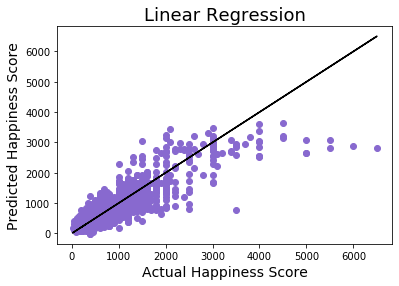

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_lin, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## Lasso Regression

In [64]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train, y_train)
ls.score(X_train, y_train)
pred_ls = ls.predict(X_test)

lss = r2_score(y_test, pred_ls)
print('R2 Score:',lss*100)

R2 Score: 76.37134647875622


In [75]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 191.41099341701403
Mean Squared Error: 97384.20266079906
Root Mean Square Error: 312.0644206903425


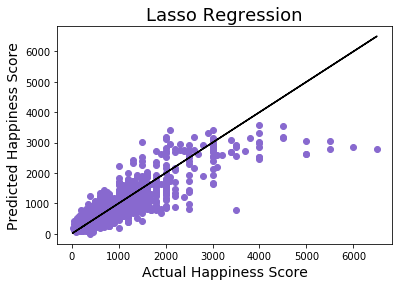

In [76]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

## Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

rg = Ridge()
rg.fit(X_train, y_train)
rg.score(X_train, y_train)
pred_rg = rg.predict(X_test)

rgs = r2_score(y_test, pred_rg)
print('R2 Score:',rgs*100)

R2 Score: 76.37628795614695


In [77]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Error:
Mean Absolute Error: 191.34575048311171
Mean Squared Error: 97363.83663210299
Root Mean Square Error: 312.0317878551847


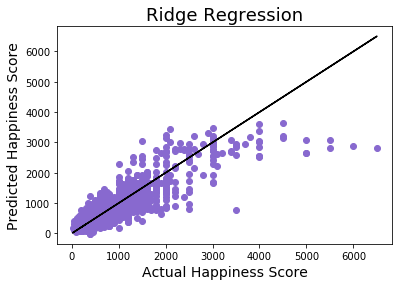

In [78]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_rg, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

## KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)
pred_kn = kn.predict(X_test)

kns = r2_score(y_test,pred_kn)
print('R2 Score:',kns*100)

R2 Score: 58.58910529468042


In [79]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_kn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_kn))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_kn)))

Error:
Mean Absolute Error: 228.4475357710652
Mean Squared Error: 170672.73675675676
Root Mean Square Error: 413.1255702044558


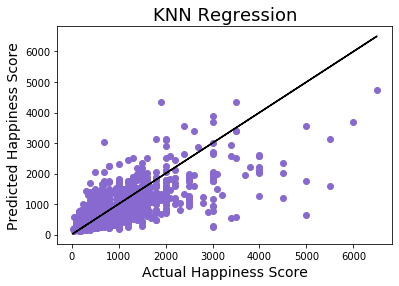

In [80]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_kn, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('KNN Regression',fontsize=18)
plt.show()

## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)
pred_dtr = dtr.predict(X_test)

dtrs = r2_score(y_test,pred_dtr)
print('R2 Score:',dtrs*100)

R2 Score: 45.20939080830352


In [81]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean Absolute Error: 274.68800489795075
Mean Squared Error: 225816.49794964466
Root Mean Square Error: 475.2015340354497


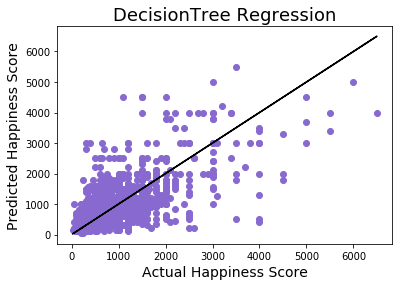

In [82]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_dtr, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('DecisionTree Regression',fontsize=18)
plt.show()

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
pred_random = rf.predict(X_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

R2 Score: 74.44313745428384


In [83]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:
Mean Absolute Error: 193.70703732994306
Mean Squared Error: 105331.2106544105
Root Mean Square Error: 324.5477016624991


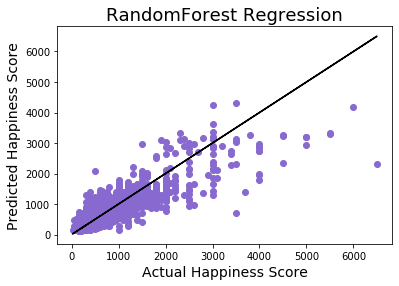

In [84]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_random, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('RandomForest Regression',fontsize=18)
plt.show()

## GradientBoost Regression

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train)
pred_gb = gbr.predict(X_test)

gbs = r2_score(y_test,pred_gb)
print('R2 Score:',gbs*100)

R2 Score: 74.16814108792748


In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))

Error:
Mean Absolute Error: 195.23596014141538
Mean Squared Error: 106464.593132094
Root Mean Square Error: 326.28912505949995


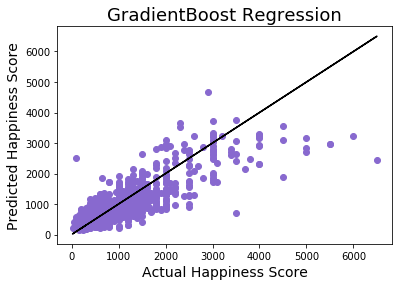

In [86]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_gb, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('GradientBoost Regression',fontsize=18)
plt.show()

## ADABoost

In [70]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada.score(X_train, y_train)
pred_ada = ada.predict(X_test)

adas = r2_score(y_test,pred_ada)
print('R2 Score:',adas*100)

R2 Score: -10.37586919141884


In [87]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ada)))

Error:
Mean Absolute Error: 610.3601583403298
Mean Squared Error: 454908.1057257457
Root Mean Square Error: 674.4687581539606


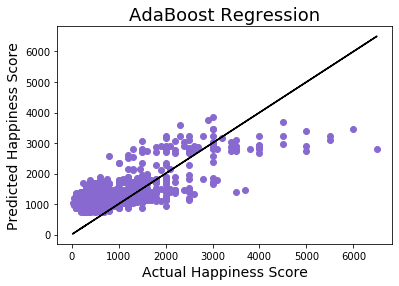

In [88]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ada, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('AdaBoost Regression',fontsize=18)
plt.show()

## XGB

In [71]:
import xgboost as xgb

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_train, y_train)
pred_xg = xg.predict(X_test)

xgs = r2_score(y_test,pred_xg)
print('R2 Score:',xgs*100)

R2 Score: 73.04038384896249


In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_xg)))

Error:
Mean Absolute Error: 195.38446533206158
Mean Squared Error: 111112.58288795575
Root Mean Square Error: 333.3355409912897


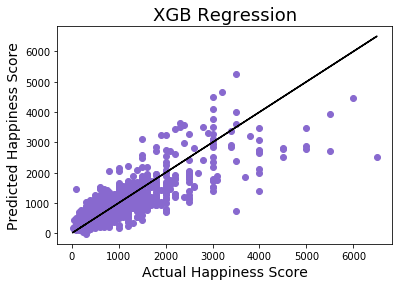

In [90]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_xg, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

## BaggingRegressor

In [72]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor()
bg.fit(X_train, y_train)
bg.score(X_train, y_train)
pred_bg = bg.predict(X_test)

bgs = r2_score(y_test,pred_bg)
print('R2 Score:',bgs*100)

R2 Score: 71.93562035595949


In [91]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_bg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_bg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_bg)))

Error:
Mean Absolute Error: 203.28208639115374
Mean Squared Error: 115665.8051779238
Root Mean Square Error: 340.0967585525093


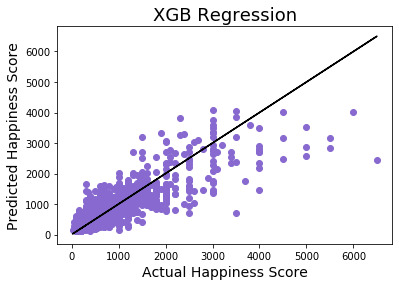

In [92]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_bg, color='#8869cf')
plt.plot(y_test,y_test, color='black')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

#### Picking the model

In [93]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression','KNN','Decision Tree Regression',
              'Random Forest Regression','Gradient Boost Regression','AdaBoost Regressor','XGBoost','BaggingRegressor'],
    'R2 Score': [lgs*100, lss*100, rgs*100, kns*100, dtrs*100, rfs*100, gbs*100, adas*100, xgs*100, bgs*100]})
models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,Linear Regression,76.376951
2,Ridge Regression,76.376288
1,Lasso Regression,76.371346
5,Random Forest Regression,74.443137
6,Gradient Boost Regression,74.168141
8,XGBoost,73.040384
9,BaggingRegressor,71.935620
3,KNN,58.589105
4,Decision Tree Regression,45.209391
7,AdaBoost Regressor,-10.375869


__The best 3 models are:__

1. Linear Regression
2. Ridge Regression
3. Lasso Regression

#### CrossValidation

In [94]:
linscore = cross_val_score(lg,train,targets,cv=5)
linc = linscore.mean() 
print('Cross Val Score:',linc*100)

Cross Val Score: 70.55214038152913


In [95]:
lsscore = cross_val_score(ls,train,targets,cv=5)
lsc = lsscore.mean() 
print('Cross Val Score:',lsc*100)

Cross Val Score: 70.63404655744847


In [96]:
rgscore = cross_val_score(rg,train,targets,cv=5)
rgc = rgscore.mean() 
print('Cross Val Score:',rgc*100)

Cross Val Score: 70.55242132766868


The best cross validation score is given by the lasso Rigression and hence that is our best model.

#### Saving the best model

In [97]:
import pickle

filename = 'Restraunt_Cost_Prediction.pkl'
pickle.dump(ls, open(filename, 'wb'))

# Testing Phase

In [98]:
pred_ls = ls.predict(test)
df = pd.DataFrame(pred_ls)
df.to_csv('Restraunt_Cost_Prediction.csv')